<a href="https://colab.research.google.com/github/ttobio/VS/blob/main/sdflib_prep_docking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Download and install Open Babel (This will take more than a couple of minutes)
!wget -q https://github.com/openbabel/openbabel/archive/refs/tags/openbabel-3-1-1.tar.gz
!tar -xzf openbabel-3-1-1.tar.gz
%cd openbabel-openbabel-3-1-1
!mkdir build
%cd build
!cmake ..
!make
!make install
!ldconfig
%cd ../..

/content/openbabel-openbabel-3-1-1
/content/openbabel-openbabel-3-1-1/build
CMake Deprecation Warning at CMakeLists.txt:3 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Deprecation Warning at CMakeLists.txt:14 (cmake_policy):
  The OLD behavior for policy CMP0042 will be rem

In [95]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-12-08 19:06:33--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   119MB/s    in 0.7s    

2024-12-08 19:06:34 (119 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

In [96]:
! conda install -y -c conda-forge openbabel

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [101]:
! pip install biopython

     |████████████████████████████████| 3.0 MB 7.2 MB/s 
     |████████████████████████████████| 15.7 MB 41.1 MB/s 


In [105]:
!pip install biopython==1.78

     |████████████████████████████████| 2.3 MB 6.1 MB/s 
  Attempting uninstall: biopython
    Found existing installation: biopython 1.81
    Uninstalling biopython-1.81:
      Successfully uninstalled biopython-1.81


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
%%bash
mkdir /content/library
cd /content/library
cp /content/drive/MyDrive//PCRG/marine.sdf .

In [29]:
%%bash
cd /content/library
#splitting the library into individual molecules
obabel -isdf marine.sdf -osdf -O *.sdf -m
#Removing the original library
rm marine.sdf

48 molecules converted
48 files output. The first is marine1.sdf


In [30]:
!ls /content/library | wc -l

48


In [32]:
%%bash
cd /content/library
# Loop over all SDF files in the current directory
for file in *.sdf
do
  # Extract the filename without the extension
  base_name=$(basename "$file" .sdf)

  # Perform geometry optimization and save the output to a new file
  obgen "$file" -ff MMFF94 > "${base_name}_op.sdf"

  # Print a message indicating the file has been processed
  echo "Processed $file -> ${base_name}_op.sdf"
done


Processed marine10.sdf -> marine10_op.sdf
Processed marine11.sdf -> marine11_op.sdf
Processed marine12.sdf -> marine12_op.sdf
Processed marine13.sdf -> marine13_op.sdf
Processed marine14.sdf -> marine14_op.sdf
Processed marine15.sdf -> marine15_op.sdf
Processed marine16.sdf -> marine16_op.sdf
Processed marine17.sdf -> marine17_op.sdf
Processed marine18.sdf -> marine18_op.sdf
Processed marine19.sdf -> marine19_op.sdf
Processed marine1.sdf -> marine1_op.sdf
Processed marine20.sdf -> marine20_op.sdf
Processed marine21.sdf -> marine21_op.sdf
Processed marine22.sdf -> marine22_op.sdf
Processed marine23.sdf -> marine23_op.sdf
Processed marine24.sdf -> marine24_op.sdf
Processed marine25.sdf -> marine25_op.sdf
Processed marine26.sdf -> marine26_op.sdf
Processed marine27.sdf -> marine27_op.sdf
Processed marine28.sdf -> marine28_op.sdf
Processed marine29.sdf -> marine29_op.sdf
Processed marine2.sdf -> marine2_op.sdf
Processed marine30.sdf -> marine30_op.sdf
Processed marine31.sdf -> marine31_op.


A T O M   T Y P E S

IDX	TYPE	RING
1	59	AR
2	63	AR
3	64	AR
4	64	AR
5	63	AR
6	1	AL
7	2	AL
8	2	AL
9	1	AL
10	1	AL
11	2	AL
12	2	AL
13	1	AL
14	1	NO
15	1	NO
16	1	NO
17	5	NO
18	5	NO
19	5	NO
20	5	NO
21	5	NO
22	5	NO
23	5	NO
24	5	NO
25	5	NO
26	5	NO
27	5	NO
28	5	NO
29	5	NO
30	5	NO
31	5	NO
32	5	NO
33	5	NO
34	5	NO
35	5	NO
36	5	NO

F O R M A L   C H A R G E S

IDX	CHARGE
1	0.000000
2	0.000000
3	0.000000
4	0.000000
5	0.000000
6	0.000000
7	0.000000
8	0.000000
9	0.000000
10	0.000000
11	0.000000
12	0.000000
13	0.000000
14	0.000000
15	0.000000
16	0.000000
17	0.000000
18	0.000000
19	0.000000
20	0.000000
21	0.000000
22	0.000000
23	0.000000
24	0.000000
25	0.000000
26	0.000000
27	0.000000
28	0.000000
29	0.000000
30	0.000000
31	0.000000
32	0.000000
33	0.000000
34	0.000000
35	0.000000
36	0.000000

P A R T I A L   C H A R G E S

IDX	CHARGE
1	-0.280000
2	-0.040000
3	-0.181000
4	-0.181000
5	-0.010000
6	0.319200
7	-0.288200
8	-0.276400
9	0.138200
10	0.138200
11	-0.288200
12	-0.276400
13	0.318200
14	0.138200
15	0.

In [34]:
%%bash
cd /content/library
mkdir optimized
mv *_op.sdf optimized

In [35]:
%%bash
cd /content/library/optimized
#converting all the optimized structures into .pdbqt for docking
obabel -isdf *.sdf -opdbqt -O *.pdbqt -h
mkdir pdbqt
#moving them into new directory
mv *.pdbqt pdbqt

48 molecules converted
48 files output. The first is marine10_op.pdbqt


In [56]:
!chmod +x /content/drive/MyDrive/PCRG/vina_1.2.5_linux_x86_64

In [64]:
import os, sys

# Path to the directory containing 'vina' binary
vina_dir = "/content/drive/MyDrive/PCRG"
# Add the directory to the PATH
os.environ['PATH'] += os.pathsep + vina_dir
# Verify it's been added
!echo $PATH


/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/drive/MyDrive/PCRG/vina.exe:/content/drive/MyDrive/PCRG/vina.exe:/content/drive/MyDrive/PCRG/vina:/content/drive/MyDrive/PCRG/vina:/content/drive/MyDrive/PCRG/vina:/content/drive/MyDrive/PCRG/vina:/content/drive/MyDrive/PCRG:/content/drive/MyDrive/PCRG


In [65]:
!vina_1.2.5_linux_x86_64 --help

AutoDock Vina v1.2.5

Input:
  --receptor arg             rigid part of the receptor (PDBQT)
  --flex arg                 flexible side chains, if any (PDBQT)
  --ligand arg               ligand (PDBQT)
  --batch arg                batch ligand (PDBQT)
  --scoring arg (=vina)      scoring function (ad4, vina or vinardo)

Search space (required):
  --maps arg                 affinity maps for the autodock4.2 (ad4) or vina 
                             scoring function
  --center_x arg             X coordinate of the center (Angstrom)
  --center_y arg             Y coordinate of the center (Angstrom)
  --center_z arg             Z coordinate of the center (Angstrom)
  --size_x arg               size in the X dimension (Angstrom)
  --size_y arg               size in the Y dimension (Angstrom)
  --size_z arg               size in the Z dimension (Angstrom)
  --autobox                  set maps dimensions based on input ligand(s) (for 
                             --score_only and --local_o

In [67]:
!chmod +x /content/drive/MyDrive/PCRG/sdflib-docking.sh

In [71]:
%%bash
ls /content/drive/MyDrive/PCRG/protein.pdbqt
ls /content/drive/MyDrive/PCRG/conf.txt
ls /content/library/optimized/pdbqt

/content/drive/MyDrive/PCRG/protein.pdbqt
/content/drive/MyDrive/PCRG/conf.txt
marine10_op.pdbqt
marine11_op.pdbqt
marine12_op.pdbqt
marine13_op.pdbqt
marine14_op.pdbqt
marine15_op.pdbqt
marine16_op.pdbqt
marine17_op.pdbqt
marine18_op.pdbqt
marine19_op.pdbqt
marine1_op.pdbqt
marine20_op.pdbqt
marine21_op.pdbqt
marine22_op.pdbqt
marine23_op.pdbqt
marine24_op.pdbqt
marine25_op.pdbqt
marine26_op.pdbqt
marine27_op.pdbqt
marine28_op.pdbqt
marine29_op.pdbqt
marine2_op.pdbqt
marine30_op.pdbqt
marine31_op.pdbqt
marine32_op.pdbqt
marine33_op.pdbqt
marine34_op.pdbqt
marine35_op.pdbqt
marine36_op.pdbqt
marine37_op.pdbqt
marine38_op.pdbqt
marine39_op.pdbqt
marine3_op.pdbqt
marine40_op.pdbqt
marine41_op.pdbqt
marine42_op.pdbqt
marine43_op.pdbqt
marine44_op.pdbqt
marine45_op.pdbqt
marine46_op.pdbqt
marine47_op.pdbqt
marine48_op.pdbqt
marine4_op.pdbqt
marine5_op.pdbqt
marine6_op.pdbqt
marine7_op.pdbqt
marine8_op.pdbqt
marine9_op.pdbqt


In [72]:
%%bash
/content/drive/MyDrive/PCRG/sdflib-docking.sh -r /content/drive/MyDrive/PCRG/protein.pdbqt -c /content/drive/MyDrive/PCRG/conf.txt -L /content/library/optimized/pdbqt -o /content/library/optimized/pdbqt/results

Process is interrupted.


In [106]:
import os
from openbabel import pybel
from Bio.PDB import PDBParser, PDBIO

In [107]:
!cd /content/library/optimized/pdbqt/results
!makedir poses
# Function to extract ligand coordinates from PDBQT file
def extract_ligand_coordinates(pdbqt_file):
    ligand_coordinates = []
    for mol in pybel.readfile("pdbqt", pdbqt_file):
        ligand_coordinates.append(mol)
    return ligand_coordinates

# Load protein structure from PDB file
def load_protein_structure(pdb_file):
    parser = PDBParser(QUIET=True)  # QUIET=True suppresses warnings
    structure = parser.get_structure("protein", pdb_file)
    return structure

# Function to save complex as PDB file
def save_complex_as_pdb(protein_structure, ligand, output_file):
    # Write the protein structure to the PDB file
    io = PDBIO()
    io.set_structure(protein_structure)
    io.save(output_file)

    # Append the ligand coordinates to the PDB file
    with open(output_file, 'a') as pdb_file:
        pdb_file.write("END\n")
        pdb_file.write(ligand.write("pdb"))

# Function to process a single PDBQT file
def process_pdbqt_file(pdbqt_file, protein_structure, output_dir):
    # Extract ligand coordinates from PDBQT file
    ligand_coordinates = extract_ligand_coordinates(pdbqt_file)

    # Save each complex
    for i, ligand in enumerate(ligand_coordinates):
        output_file = os.path.join(output_dir, f"complex_{i + 1}.pdb")
        save_complex_as_pdb(protein_structure, ligand, output_file)
        print(f"Saved complex {i + 1} to {output_file}")

# Main function to process all PDBQT files in a directory
def main(pdbqt_dir, protein_pdb_file, output_base_dir):
    # Check if the protein file exists
    if not os.path.isfile(protein_pdb_file):
        print(f"Error: Protein PDB file '{protein_pdb_file}' not found.")
        return

    # Load protein structure
    protein_structure = load_protein_structure(protein_pdb_file)

    # Iterate over all PDBQT files in the specified directory
    for pdbqt_file in os.listdir(pdbqt_dir):
        if pdbqt_file.endswith(".pdbqt"):
            pdbqt_file_path = os.path.join(pdbqt_dir, pdbqt_file)
            compound_name = os.path.splitext(pdbqt_file)[0]
            compound_output_dir = os.path.join(output_base_dir, compound_name)

            # Create the output directory for the compound if it doesn't exist
            if not os.path.exists(compound_output_dir):
                os.makedirs(compound_output_dir)

            print(f"Processing {pdbqt_file_path} into {compound_output_dir}")
            process_pdbqt_file(pdbqt_file_path, protein_structure, compound_output_dir)

# usage
if __name__ == "__main__":
    pdbqt_dir_path = "/content/library/optimized/pdbqt/results"
    protein_pdb_file_path = "/content/drive/MyDrive/PCRG/protein.pdb"
    output_base_dir_path = "/content/library/optimized/pdbqt/results/poses"

    print(f"Processing all PDBQT files in {pdbqt_dir_path}")
    main(pdbqt_dir_path, protein_pdb_file_path, output_base_dir_path)

/bin/bash: line 1: makedir: command not found
Processing all PDBQT files in /content/library/optimized/pdbqt/results
Processing /content/library/optimized/pdbqt/results/marine11_op_results.pdbqt into /content/library/optimized/pdbqt/results/poses/marine11_op_results
Saved complex 1 to /content/library/optimized/pdbqt/results/poses/marine11_op_results/complex_1.pdb
Saved complex 2 to /content/library/optimized/pdbqt/results/poses/marine11_op_results/complex_2.pdb
Saved complex 3 to /content/library/optimized/pdbqt/results/poses/marine11_op_results/complex_3.pdb
Saved complex 4 to /content/library/optimized/pdbqt/results/poses/marine11_op_results/complex_4.pdb
Saved complex 5 to /content/library/optimized/pdbqt/results/poses/marine11_op_results/complex_5.pdb
Saved complex 6 to /content/library/optimized/pdbqt/results/poses/marine11_op_results/complex_6.pdb
Saved complex 7 to /content/library/optimized/pdbqt/results/poses/marine11_op_results/complex_7.pdb
Saved complex 8 to /content/libra

In [113]:
import re
import pandas as pd
import pandas as pd

#Path to your log file
log_file_path = "/content/drive/MyDrive/PCRG/log.txt"
#Path to the output directory - made above using mkdir
output_dir = "/content/library/optimized/pdbqt/results/csv"

# Check if the output directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read the log.txt file
with open(log_file_path, 'r') as file:
    log_data = file.read()

# Split the log data into sections by the delimiter "++++++++++"
ligand_sections = log_data.split("++++++++++")

# Define a regular expression pattern to match the ligand name and affinity lines
ligand_name_pattern = re.compile(r'Ligand:\s+(\S+\.pdbqt)')
affinity_pattern = re.compile(r'^\s*\d+\s+(-?\d+\.\d+)', re.MULTILINE)

# Process each section and extract data
for section in ligand_sections:
    # Extract the ligand name
    ligand_match = ligand_name_pattern.search(section)
    if not ligand_match:
        continue
    ligand_name = ligand_match.group(1).replace(".pdbqt", "")

    # Extract affinity data
    affinities = affinity_pattern.findall(section)
    if not affinities:
        continue

    # Create a DataFrame for the affinities
    df = pd.DataFrame({'Binding Affinities (kcal/mol)': affinities})

    # Save the DataFrame to a CSV file
    output_file_path = os.path.join(output_dir, f'{ligand_name}_results.csv')
    df.to_csv(output_file_path, index=False)
    print(f"CSV file created for {ligand_name} in {output_file_path}")

print("All CSV files have been created.")

CSV file created for AS_1 in /content/library/optimized/pdbqt/results/csv/AS_1_results.csv
CSV file created for AS_2 in /content/library/optimized/pdbqt/results/csv/AS_2_results.csv
CSV file created for AS_3 in /content/library/optimized/pdbqt/results/csv/AS_3_results.csv
CSV file created for AS_4 in /content/library/optimized/pdbqt/results/csv/AS_4_results.csv
CSV file created for AS_5 in /content/library/optimized/pdbqt/results/csv/AS_5_results.csv
CSV file created for AS_6 in /content/library/optimized/pdbqt/results/csv/AS_6_results.csv
CSV file created for AS_85 in /content/library/optimized/pdbqt/results/csv/AS_85_results.csv
CSV file created for AS_99 in /content/library/optimized/pdbqt/results/csv/AS_99_results.csv
CSV file created for AS_NC in /content/library/optimized/pdbqt/results/csv/AS_NC_results.csv
All CSV files have been created.


In [114]:
# Creating a csv file combining the binding affinities - all poses
input_dir = "/content/library/optimized/pdbqt/results/csv"

# Prompt the user to enter the output directory for the combined CSV file
output_dir = r"/content/library/optimized/pdbqt/results"

# Check if the output directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all CSV files in the input directory that match the pattern '*_results.csv'
csv_files = [f for f in os.listdir(input_dir) if f.endswith('_results.csv')]

# Initialize a list to store data from each CSV file
combined_data = []

# Process each CSV file
for csv_file in csv_files:
    # Extract the ligand name from the file name
    ligand_name = csv_file.replace('_results.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(input_dir, csv_file))

    # Add a column for the ligand name
    df['Ligand'] = ligand_name

    # Append the DataFrame to the list
    combined_data.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(combined_data, ignore_index=True)

# Reorder columns to have 'Ligand' first and 'Binding Affinities' second
combined_df = combined_df[['Ligand', 'Binding Affinities (kcal/mol)']]

# Save the combined DataFrame to a new CSV file in the output directory
output_file_path = os.path.join(output_dir, 'combined_results.csv')
combined_df.to_csv(output_file_path, index=False)

print(f"Combined CSV file created at {output_file_path}")

Combined CSV file created at /content/library/optimized/pdbqt/results/combined_results.csv


In [115]:
# Creating a csv file combining the binding affinities - first pose only
input_dir = "/content/library/optimized/pdbqt/results/csv"
output_dir = "/content/library/optimized/pdbqt/results/csv"

# Check if the output directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all CSV files in the input directory that match the pattern '*_results.csv'
csv_files = [f for f in os.listdir(input_dir) if f.endswith('_results.csv')]

# Initialize a list to store data for the first pose of each ligand
first_pose_data = []

# Process each CSV file
for csv_file in csv_files:
    # Extract the ligand name from the file name
    ligand_name = csv_file.replace('_results.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(input_dir, csv_file))

    # Check if the DataFrame is not empty
    if not df.empty:
        # Get the first pose (first row) binding affinity
        first_pose_affinity = df['Binding Affinities (kcal/mol)'].iloc[0]

        # Append the ligand name and first pose affinity to the list
        first_pose_data.append({'Ligand': ligand_name, 'Binding Affinity (kcal/mol)': first_pose_affinity})

# Create a DataFrame from the list
first_pose_df = pd.DataFrame(first_pose_data)

# Save the DataFrame to a new CSV file in the output directory
output_file_path = os.path.join(output_dir, 'first_pose_affinities.csv')
first_pose_df.to_csv(output_file_path, index=False)

print(f"CSV file with first pose affinities created at {output_file_path}")

CSV file with first pose affinities created at /content/library/optimized/pdbqt/results/csv/first_pose_affinities.csv


In [116]:
import shutil
# Saving all the results at your drive
# Define your folder path and destination in Drive
folder_path = "/content/library/optimized/pdbqt/results"
drive_path = "/content/drive/MyDrive/PCRG/docking-results"  # This will be the folder in your Drive

# Copy the folder to Drive
shutil.copytree(folder_path, drive_path)

print(f"Folder '{folder_path}' successfully copied to Google Drive at '{drive_path}'")


Folder '/content/library/optimized/pdbqt/results' successfully copied to Google Drive at '/content/drive/MyDrive/PCRG/docking-results'


In [119]:
# Exploring the affinities
first_pose_df.head()

,Ligand,Binding Affinity (kcal/mol)
0,AS_NC,-9.539
1,AS_85,-9.315
2,AS_2,-8.929
3,AS_1,-7.005
4,AS_3,-8.905


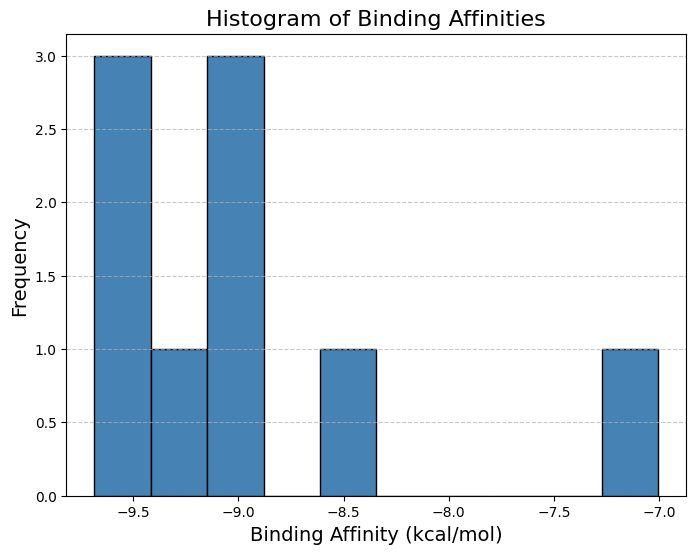

In [126]:
output_dir = "/content/library/optimized/pdbqt/results/csv"
output_file = "binding_affinity_histogram.png"
# Plotting the results - first poses as a histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(first_pose_df["Binding Affinity (kcal/mol)"], bins=10, color="steelblue", edgecolor="black")

# Add titles and labels
plt.title("Histogram of Binding Affinities", fontsize=16)
plt.xlabel("Binding Affinity (kcal/mol)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
#saving the plot
plt.savefig(os.path.join(output_dir, output_file), dpi=600, format='png', bbox_inches="tight")
# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

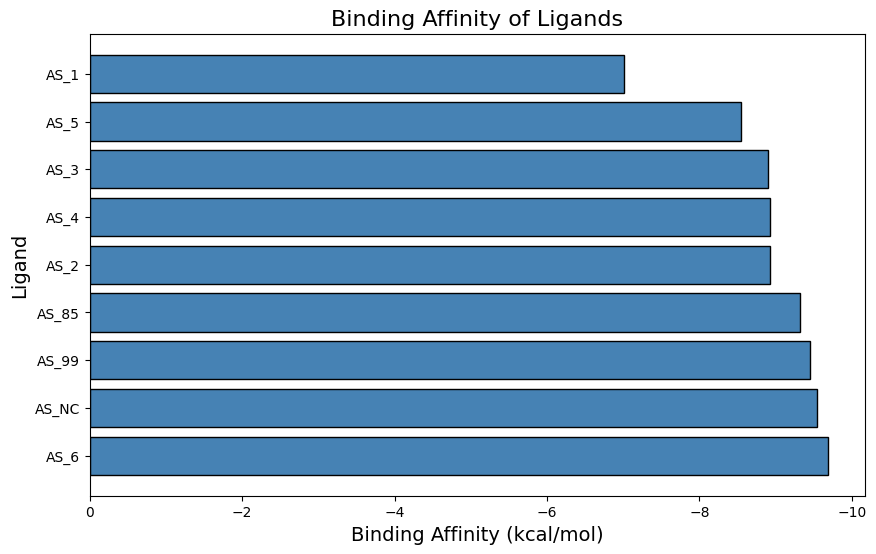

In [138]:
output_dir = "/content/library/optimized/pdbqt/results/csv"
output_file = "binding_affinity_barplot.png"
# Plotting the results - first poses as a bar plots

first_pose_df = first_pose_df.sort_values(by="Binding Affinity (kcal/mol)", ascending=True)
# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(first_pose_df["Ligand"], first_pose_df["Binding Affinity (kcal/mol)"], color="steelblue", edgecolor="black")

# Flip the y-axis so more negative values appear higher
plt.gca().invert_xaxis()

# Add labels and title
plt.title("Binding Affinity of Ligands", fontsize=16)
plt.xlabel("Binding Affinity (kcal/mol)", fontsize=14)
plt.ylabel("Ligand", fontsize=14)

# Save the plot (optional)
plt.savefig(os.path.join(output_dir, output_file), dpi=600, format='png', bbox_inches="tight")

# Display the plot
plt.show()
